In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

churn = pd.read_csv('churn.csv')
print(churn.head())

   has_churned  time_since_first_purchase  time_since_last_purchase
0            0                  -1.089221                 -0.721322
1            0                   1.182983                  3.634435
2            0                  -0.846156                 -0.427582
3            0                   0.086942                 -0.535672
4            0                  -1.166642                 -0.672640


## Exploring the explanatory variables
When the response variable is logical, all the points lie on the $y=0$
 and $y=1$
 lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

You will use these histograms to get to know the financial services churn dataset seen in the video.

churn is available as a pandas DataFrame.

#### Instructions 
+ In a sns.displot() call on the churn data, plot time_since_last_purchase as two histograms, split for each has_churned value.
+ Redraw the histograms using the time_since_first_purchase column, split for each has_churned value.

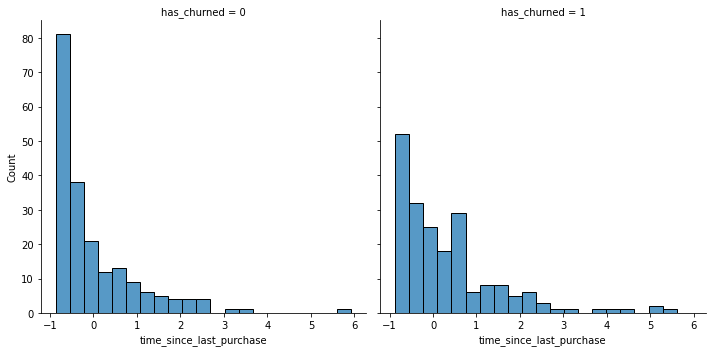

In [2]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn, x='time_since_last_purchase', col='has_churned')

plt.show()

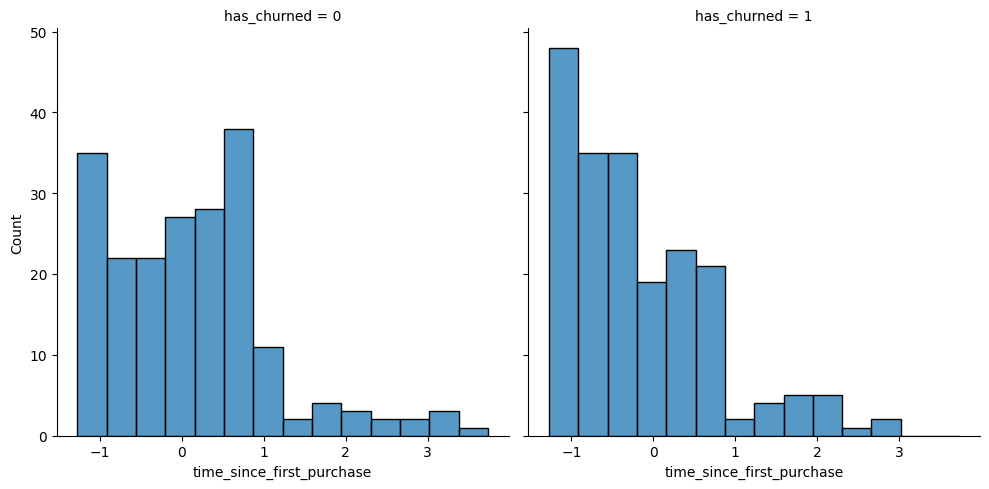

In [3]:
# Redraw the plot with time_since_first_purchase
sns.displot(data=churn,
            x="time_since_first_purchase",
            col="has_churned")

plt.show()

## Visualizing linear and logistic models
As with linear regressions, regplot() will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

churn is available.

#### Instructions
+ Using churn, plot has_churned versus time_since_first_purchase as a scatter plot with a red linear regression trend line (without a standard error ribbon).
+ Using churn, plot has_churned versus time_since_first_purchase as a scatter plot with a blue logistic regression trend line (without a standard error ribbon).

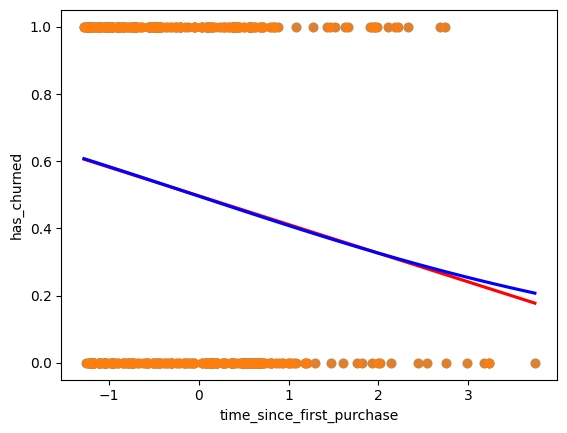

In [4]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True,
            line_kws={"color": "blue"})

plt.show()

## Logistic regression with logit()
Logistic regression requires another function from statsmodels.formula.api: logit(). It takes the same arguments as ols(): a formula and data argument. You then use .fit() to fit the model to the data.

Here, you'll model how the length of relationship with a customer affects churn.

churn is available.

#### Instructions

+ Import the logit() function from statsmodels.formula.api.
+ Fit a logistic regression of has_churned versus time_since_first_purchase using the churn dataset. Assign to mdl_churn_vs_relationship.
+ Print the parameters of the fitted model.

In [5]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. 
# length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned~time_since_first_purchase', data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Probabilities
There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

Two variables are available:

mdl_churn_vs_relationship is the fitted logistic regression model of has_churned versus time_since_first_purchase.
explanatory_data is a DataFrame of explanatory values.

#### Instructions 1/2

+ Create a DataFrame, prediction_data, by assigning a column has_churned to explanatory_data.
+ In the has_churned column, store the predictions of the probability of churning: use the model, mdl_churn_vs_relationship, and the explanatory data, explanatory_data.
+ Print the first five lines of the prediction DataFrame.

In [6]:
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1.5, 4, .35)})

# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.15     0.596964
2                      -0.80     0.566762
3                      -0.45     0.536056
4                      -0.10     0.505074


#### Instructions 2/2
+ Create a scatter plot with a logistic trend line of has_churned versus time_since_first_purchase.
+ Overlay the plot with the points from prediction_data, colored red.

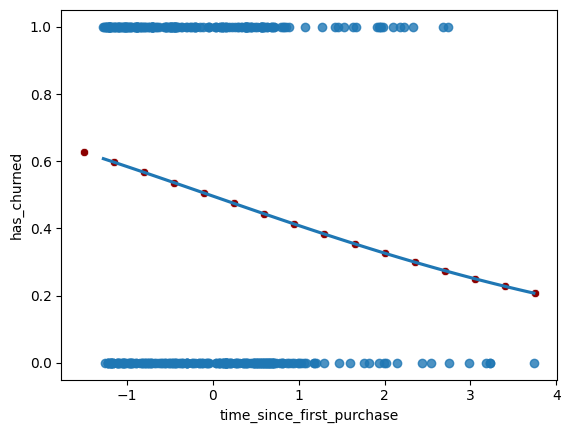

In [7]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="has_churned",
                data=prediction_data,
                color="darkred")


plt.show()

## Most likely outcome
When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

mdl_churn_vs_relationship, explanatory_data, and prediction_data are available from the previous exercise.

#### Instructions 1/2
+ Update prediction_data to add a column of the most likely churn outcome, most_likely_outcome.
+ Print the first five lines of prediction_data.
+ The code for creating a scatter plot with logistic trend line has been added from a previous exercise.
+ Overlay the plot with prediction_data with red data points, with most_likely_outcome on the y-axis.

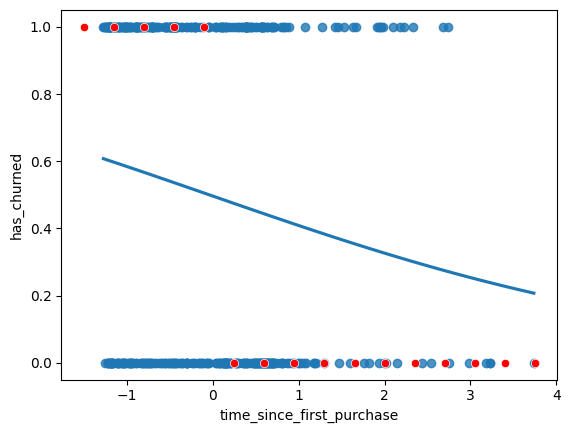

In [8]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red

sns.scatterplot(x="time_since_first_purchase",
                y="most_likely_outcome",
                data=prediction_data,
                color="red")

plt.show()

## Odds ratio
Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

mdl_churn_vs_relationship, explanatory_data, and prediction_data are available from the previous exercise.

#### Instructions

+ Update prediction_data to add a column, odds_ratio, of the odds ratios.
+ Print the first five lines of prediction_data.
+ Using prediction_data, draw a line plot of odds_ratio versus time_since_first_purchase.
+ Some code for preparing the final plot has already been added.

In [9]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.15     0.596964                  1.0    1.481166
2                      -0.80     0.566762                  1.0    1.308199
3                      -0.45     0.536056                  1.0    1.155431
4                      -0.10     0.505074                  1.0    1.020502


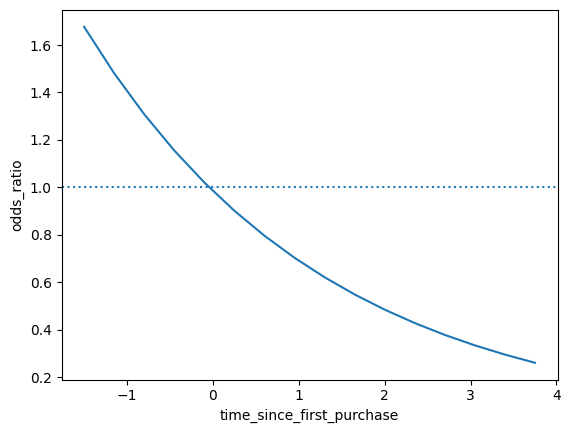

In [10]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Create a new figure
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase', y='odds_ratio', data = prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

# Show the plot
plt.show()

## Log odds ratio
One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

mdl_churn_vs_relationship, explanatory_data, and prediction_data are available from the previous exercise.

#### Instructions

+ Update prediction_data to add a log_odds_ratio column derived from odds_ratio.
+ Print the first five lines of prediction_data.
+ Update the code for the line plot to plot log_odds_ratio versus time_since_first_purchase.

In [ ]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data['odds_ratio'])

# Print the head
print(prediction_data.head())

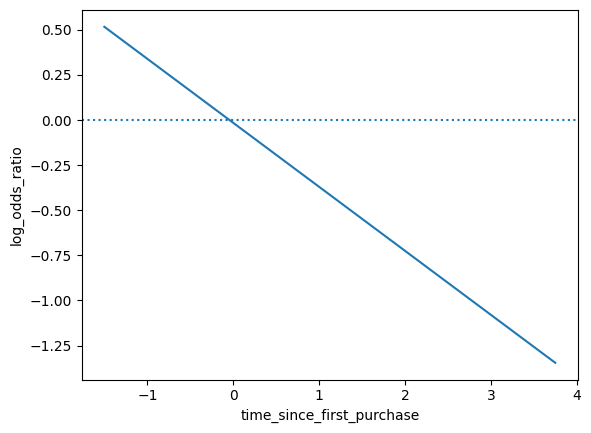

In [11]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Create a new figure
fig = plt.figure()

# Update the line plot: log_odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

# Show the plot
plt.show()

## Quantifying logistic regression fit
Resid plot, QQplot & Scale location plot are less useful in the case of logistic regression. Instead, we can use confusion matrices to analyze the fit performance. With True/False positive & negative outcomes. We can also compute metrics based on various ratios.

+ Accuracy : proportion of correct predictions. Higher better.
$$TN+TP / (TN+FN+FP+TP)$$

+ Sensitivity : proportions of observations where the actual response was true and where the model also predicted it was true. Higher better.
$$TP / (FN + TP)$$

+ Specificity : proportions of observations where the actual was false and where the model also predicted it was false. Higher better.
$$TN / (TN + FP)$$

## Calculating the confusion matrix
A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.
````
True positive: The customer churned and the model predicted they would.
False positive: The customer didn't churn, but the model predicted they would.
True negative: The customer didn't churn and the model predicted they wouldn't.
False negative: The customer churned, but the model predicted they wouldn't.
````
churn and mdl_churn_vs_relationship are available.

#### Instructions

+ Get the actual responses by subsetting the has_churned column of the dataset. Assign to actual_response.
+ Get the "most likely" predicted responses from the model. Assign to predicted_response.
+ Create a DataFrame from actual_response and predicted_response. Assign to outcomes.
+ Print outcomes as a table of counts, representing the confusion matrix. This has been done for you.

In [12]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


In [14]:
#print(type(outcomes))
print(outcomes.columns)
# Print the outcomes
# print(outcomes.value_counts(sort = False))
# print(pd.value_counts(outcomes.values.flatten()))
conf_matrix = pd.crosstab(outcomes['actual_response'], outcomes['predicted_response'], rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

Index(['actual_response', 'predicted_response'], dtype='object')
Predicted  0.0  1.0
Actual             
0          112   88
1           76  124


## Drawing a mosaic plot of the confusion matrix
While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the .pred_table() method can calculate the confusion matrix for you.

Additionally, you can use the output from the .pred_table() method to visualize the confusion matrix, using the mosaic() function.

churn and mdl_churn_vs_relationship are available.

#### Instructions

+ Import the mosaic() function from statsmodels.graphics.mosaicplot.
+ Create conf_matrix using the .pred_table() method and print it.
+ Draw a mosaic plot of the confusion matrix.

[[112.  88.]
 [ 76. 124.]]


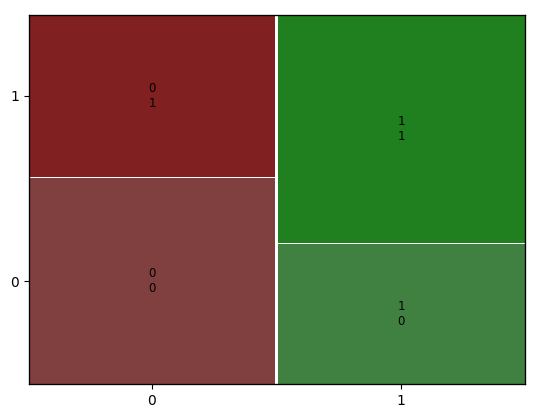

In [15]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

## Measuring logistic model performance
As you know by now, several metrics exist for measuring the performance of a logistic regression model. In this last exercise, you'll manually calculate accuracy, sensitivity, and specificity. Recall the following definitions:

Accuracy is the proportion of predictions that are correct.
$$ accuracy= \frac{TN+TP}{TN+FN+FP+TP}$$ 

Sensitivity is the proportion of true observations that are correctly predicted by the model as being true.
$$sensitivity= \frac{TP}{TP+FN}$$

Specificity is the proportion of false observations that are correctly predicted by the model as being false.
$$ specificity= \frac{TN}{TN+FP}$$

In [16]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
